In [122]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
FOLDER_PATH = '/Users/artemzmailov/Desktop/Chemical_Industry_Project/'
data = pd.read_csv(FOLDER_PATH + 'total_data_for_analysis.csv', index_col = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2061 entries, 0 to 2060
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Компания           2061 non-null   object 
 1   Категория          2061 non-null   object 
 2   Название товара    2061 non-null   object 
 3   Цена               2061 non-null   float64
 4   Скидочная Цена     2061 non-null   float64
 5   Объем              2061 non-null   float64
 6   Единицы Измерения  2061 non-null   object 
 7   Цена_Q3_2025       2061 non-null   int64  
 8   Цена_Q2_2025       2061 non-null   int64  
 9   Цена_Q1_2025       2061 non-null   int64  
 10  Цена_Q4_2024       2061 non-null   int64  
 11  Цена_Q3_2024       2061 non-null   int64  
 12  Цена_Q2_2024       2061 non-null   int64  
 13  Цена_Q1_2024       2061 non-null   int64  
 14  Цена_Q4_2023       2061 non-null   int64  
 15  Цена_Q3_2023       2061 non-null   int64  
 16  Цена_Q2_2023       2061 non-n

In [124]:
# Индексы взяты от раздела "Производство химических веществ и химических продуктов" с Росстата 
monthly_indexes = {
    # 2024-2025 (октябрь 2024 → октябрь 2025)
    '2025-01': 103.01, '2025-02': 101.60, '2025-03': 102.41, '2025-04': 99.23,
    '2025-05': 97.14, '2025-06': 95.80, '2025-07': 101.33, '2025-08': 96.05,
    '2025-09': 101.42, '2025-10': 101.04,
    
    # 2023-2024 
    '2024-01': 98.64, '2024-02': 98.61, '2024-03': 102.22, '2024-04': 101.75,
    '2024-05': 101.00, '2024-06': 99.54, '2024-07': 99.94, '2024-08': 100.65,
    '2024-09': 101.13, '2024-10': 100.62, '2024-11': 100.18, '2024-12': 100.76,
    
    # 2022-2023
    '2023-01': 100.56, '2023-02': 100.48, '2023-03': 99.73, '2023-04': 100.94,
    '2023-05': 101.78, '2023-06': 97.88, '2023-07': 100.09, '2023-08': 102.32,
    '2023-09': 103.45, '2023-10': 101.96, '2023-11': 100.74, '2023-12': 97.93,
    
    # 2021-2022
    '2022-01': 104.83, '2022-02': 100.84, '2022-03': 103.97, '2022-04': 105.57,
    '2022-05': 102.56, '2022-06': 95.42, '2022-07': 92.71, '2022-08': 94.53,
    '2022-09': 93.91, '2022-10': 97.07, '2022-11': 97.90, '2022-12': 98.68,
    
    # 2020-2021
    '2021-01': 103.47, '2021-02': 104.48, '2021-03': 105.45, '2021-04': 107.53,
    '2021-05': 106.88, '2021-06': 102.09, '2021-07': 101.06, '2021-08': 101.62,
    '2021-09': 100.86, '2021-10': 101.74, '2021-11': 104.25, '2021-12': 102.90
}

monthly_indexes_pd = pd.DataFrame.from_dict(monthly_indexes, orient = 'index').sort_index() 
monthly_price_growth_pd = (monthly_indexes_pd[0]/100).cumprod()

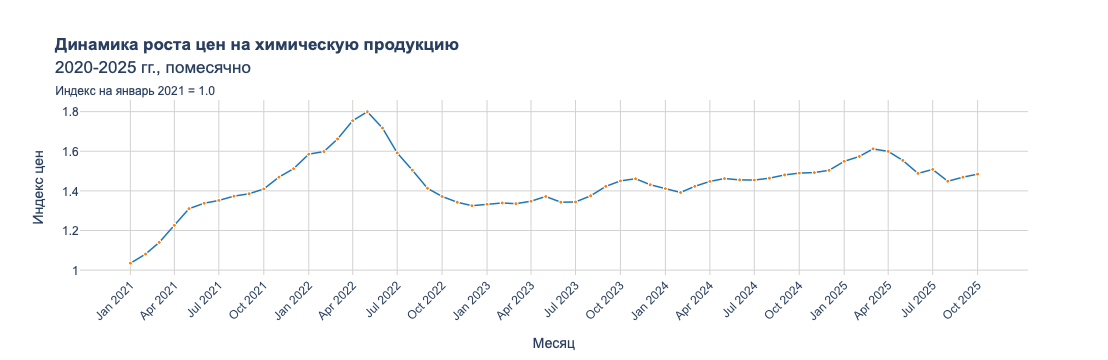

In [125]:
chemical_prices_growth_2020_2025_by_month_plot = px.line(
    x=monthly_price_growth_pd.index, 
    y=monthly_price_growth_pd,
    title='<b>Динамика роста цен на химическую продукцию</b><br>2020-2025 гг., помесячно</b><br><span style="font-size: 12px;">Индекс на январь 2021 = 1.0</span>',
    #title='<b>Динамика роста цен на химическую продукцию</b><br><span style="font-size: 12px;">Индекс на декабрь 2020 = 1.0</span>'
    labels={'x': 'Период', 'y': 'Индекс цен (база = 1)'},
    color_discrete_sequence=['#1f77b4']
)

chemical_prices_growth_2020_2025_by_month_plot.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=12),
    xaxis=dict(
        showgrid=True, 
        gridwidth=1, 
        gridcolor='lightgray',
        tickangle=-45,
        title='Месяц',
        #dtick='M3',  # показывать каждые 3 месяца для читаемости
        tickmode='array',  # явно задать деления
        tickvals=monthly_price_growth_pd.index[::3],  # каждые 3 месяца
        tickformat='%b %Y'  # формат "Янв 2021"
    ),
    yaxis=dict(
        showgrid=True, 
        gridwidth=1, 
        gridcolor='lightgray',
        title='Индекс цен'
    ),
    hovermode='x unified',
    showlegend=False
)

chemical_prices_growth_2020_2025_by_month_plot.update_traces(
    mode='lines+markers',
    marker=dict(
        size=4,                    # чуть меньше размер для месячных данных
        color='#ff7f0e',
        line=dict(width=1, color='white')
    ),
    line=dict(width=1.5),          # тоньше линия для большей детализации
    hovertemplate='<b>%{x|%B %Y}</b><br>Индекс: %{y:.2f}<extra></extra>'
)

chemical_prices_growth_2020_2025_by_month_plot.show()

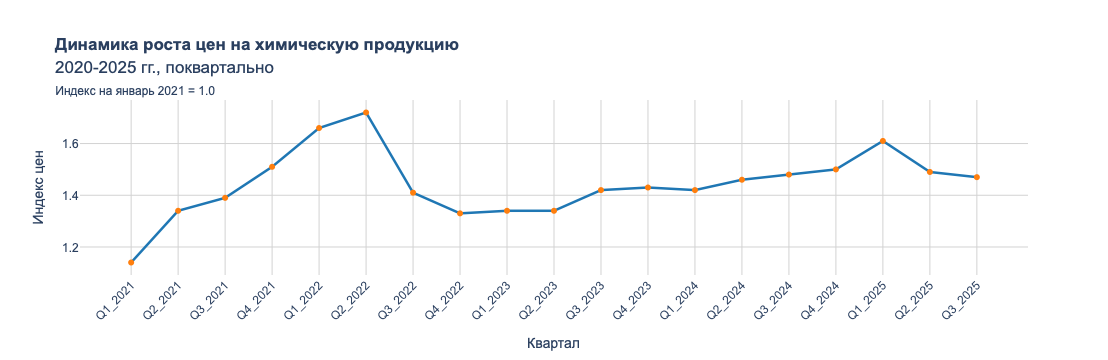

In [126]:
def create_quarterly_features(historical_prices):
    """
    Создает квартальные фичи на основе месячных данных
    Берет последний месяц каждого квартала
    """
    quarterly_features = {}
    
    # Отбираем конечные месяцы кварталов
    quarter_months = {
        'Q1': '03',  # март
        'Q2': '06',  # июнь
        'Q3': '09',  # сентябрь
        'Q4': '12'   # декабрь
    }
    
    for month, price in historical_prices.items():
        year, month_num = month.split('-')
        
        # Проверяем, является ли месяц конечным в квартале
        for quarter, end_month in quarter_months.items():
            if month_num == end_month:
                feature_name = f'Цена_{quarter}_{year}'
                quarterly_features[feature_name] = round(price, 2)
    
    return quarterly_features

quarterly_prices_growth = create_quarterly_features(monthly_price_growth_pd.to_dict())
quarterly_prices_growth = dict(zip(list(map(lambda x: x[5:],quarterly_prices_growth.keys())),quarterly_prices_growth.values()))
quarterly_prices_growth_pd = pd.DataFrame.from_dict(quarterly_prices_growth,orient = 'index').squeeze()

chemical_prices_growth_2020_2025_by_quarter_plot = px.line(
    x=quarterly_prices_growth_pd.index, 
    y=quarterly_prices_growth_pd,
    title='<b>Динамика роста цен на химическую продукцию</b><br>2020-2025 гг., поквартально</b><br><span style="font-size: 12px;">Индекс на январь 2021 = 1.0</span>',
    labels={'x': 'Период', 'y': 'Индекс цен (база = 1)'},
    color_discrete_sequence=['#1f77b4']
)

chemical_prices_growth_2020_2025_by_quarter_plot.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=12),
    xaxis=dict(
        showgrid=True, 
        gridwidth=1, 
        gridcolor='lightgray',
        tickangle=-45,
        title='Квартал'
    ),
    yaxis=dict(
        showgrid=True, 
        gridwidth=1, 
        gridcolor='lightgray',
        title='Индекс цен'
    ),
    hovermode='x unified',
    showlegend=False
)

chemical_prices_growth_2020_2025_by_quarter_plot.update_traces(
    mode='lines+markers',
    marker=dict(size=6, color='#ff7f0e'),
    line=dict(width=2.5),
    hovertemplate='<b>%{x}</b><br>Индекс: %{y:.2f}<extra></extra>'
)

chemical_prices_growth_2020_2025_by_quarter_plot.show()

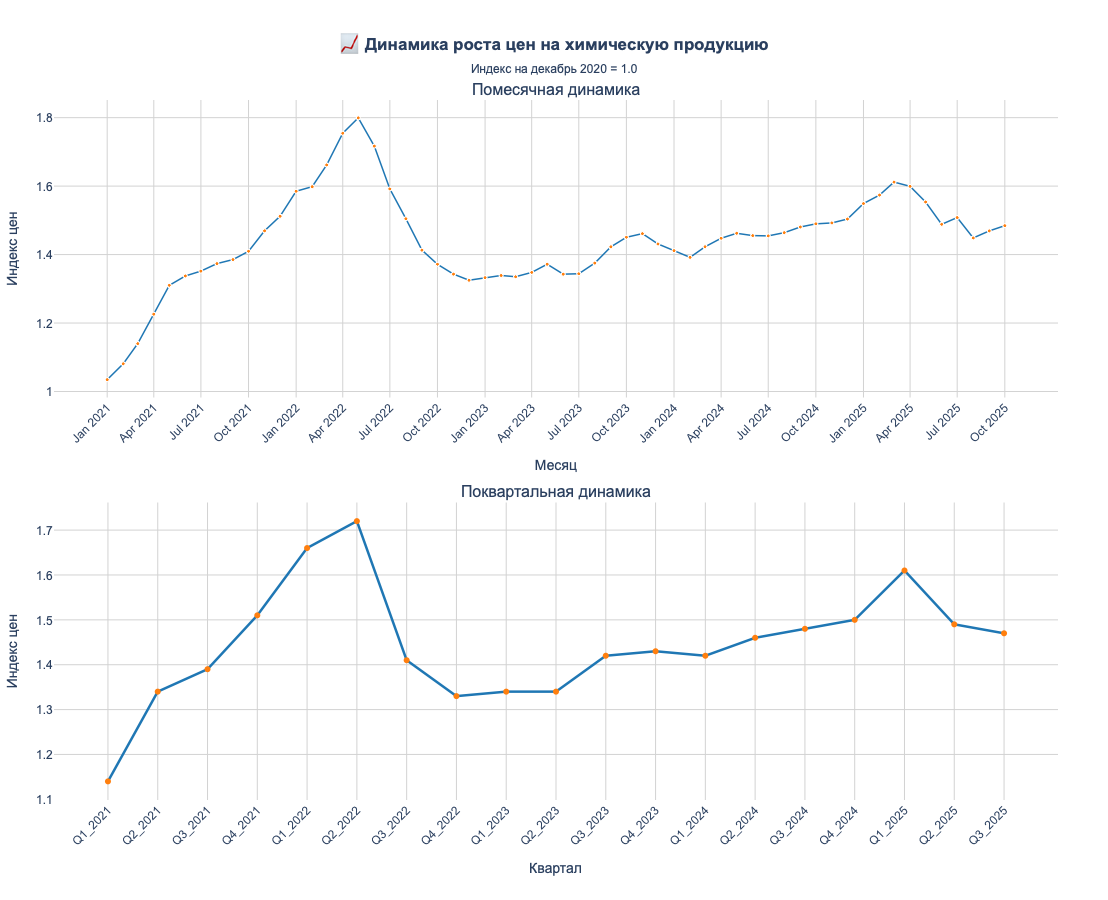

In [127]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Создаем subplots
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Помесячная динамика', 'Поквартальная динамика'),
    vertical_spacing=0.15,
    shared_xaxes=False
)

# Добавляем месячный график
fig.add_trace(
    go.Scatter(
        x=monthly_price_growth_pd.index,
        y=monthly_price_growth_pd,
        mode='lines+markers',
        name='Месячный',
        line=dict(width=1.5, color='#1f77b4'),
        marker=dict(size=4, color='#ff7f0e', line=dict(width=1, color='white')),
        hovertemplate='<b>%{x|%B %Y}</b><br>Индекс: %{y:.2f}<extra></extra>'
    ),
    row=1, col=1
)

# Добавляем квартальный график
fig.add_trace(
    go.Scatter(
        x=quarterly_prices_growth_pd.index,
        y=quarterly_prices_growth_pd,
        mode='lines+markers',
        name='Квартальный', 
        line=dict(width=2.5, color='#1f77b4'),
        marker=dict(size=6, color='#ff7f0e'),
        hovertemplate='<b>%{x}</b><br>Индекс: %{y:.2f}<extra></extra>'
    ),
    row=2, col=1
)

# Настраиваем оси для месячного графика
fig.update_xaxes(
    showgrid=True, gridwidth=1, gridcolor='lightgray',
    tickangle=-45,
    tickmode='array',
    tickvals=monthly_price_growth_pd.index[::3],
    tickformat='%b %Y',
    title_text='Месяц',
    row=1, col=1
)

fig.update_yaxes(
    showgrid=True, gridwidth=1, gridcolor='lightgray',
    title_text='Индекс цен',
    row=1, col=1
)

# Настраиваем оси для квартального графика  
fig.update_xaxes(
    showgrid=True, gridwidth=1, gridcolor='lightgray',
    tickangle=-45,
    title_text='Квартал',
    row=2, col=1
)

fig.update_yaxes(
    showgrid=True, gridwidth=1, gridcolor='lightgray',
    title_text='Индекс цен',
    row=2, col=1
)

# ОДИН update_layout со всеми настройками
fig.update_layout(
    title_text='<b>📈 Динамика роста цен на химическую продукцию</b><br><span style="font-size: 12px;">Индекс на декабрь 2020 = 1.0</span>',
    title_x=0.5,
    width=1200,
    height=900,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=12),
    showlegend=False,
    margin=dict(l=50, r=50, t=100, b=100)
)

fig.show()


#Сохраняем график в PNG
# fig.write_image(
#     FOLDER_PATH + 'graphs/Rosstat.png',
#     format="png",
#     width=1200,
#     height=900, 
#     scale=2)


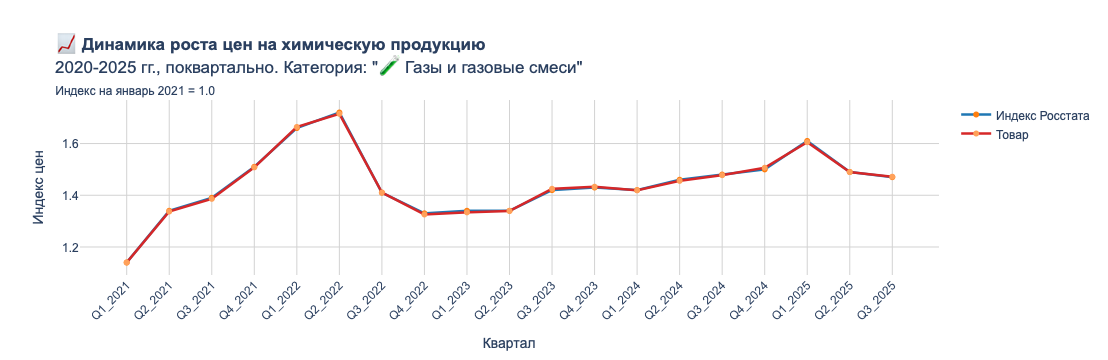

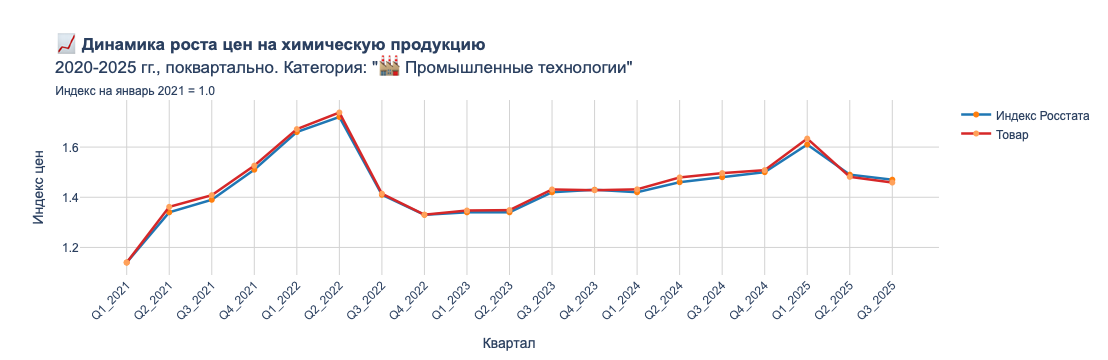

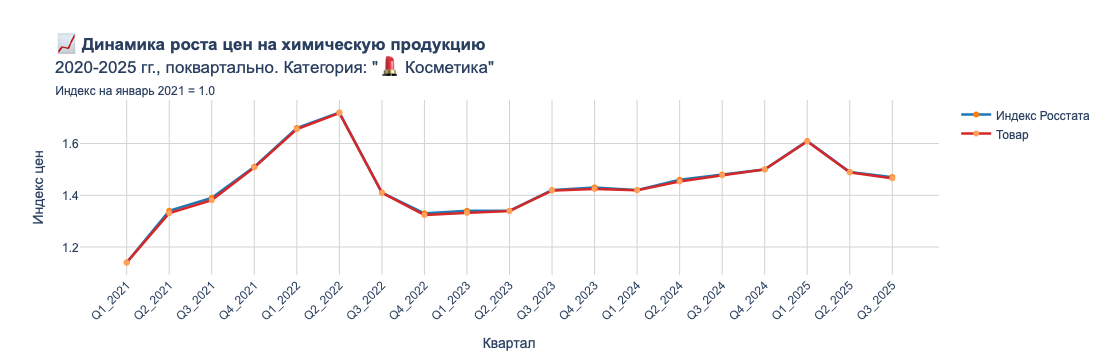

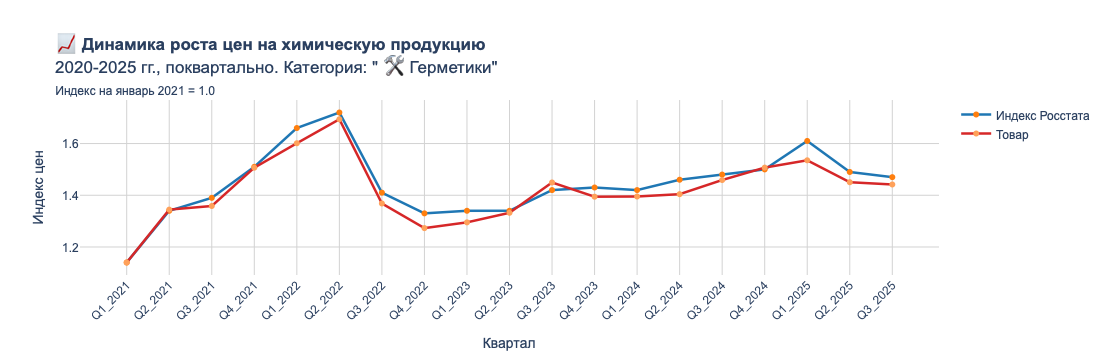

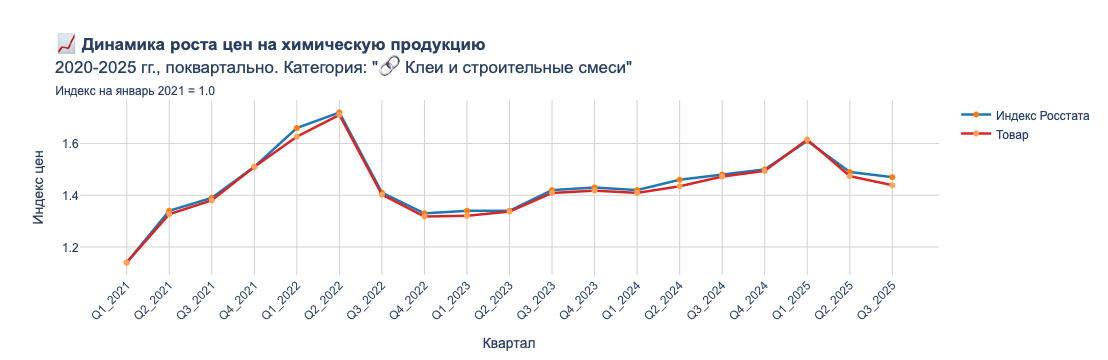

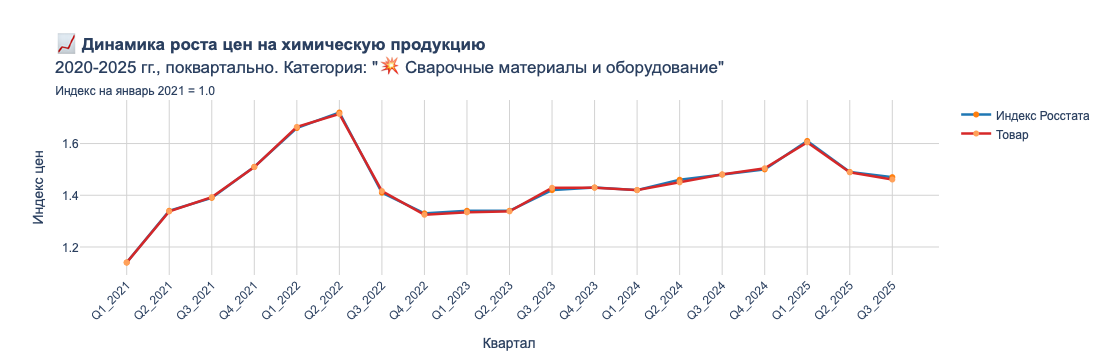

In [128]:
import plotly.graph_objects as go
def realprices_and_rosstat_comparison(data_sample, item_type = ''):
    
    if item_type == 'product':
        prefix = 'Товар:'
        
    elif item_type == 'category':
        prefix = 'Категория:'
    else:
        prefix = ''
    data_sample_price_history = data_sample[[
        'Цена_Q1_2021', 'Цена_Q2_2021', 'Цена_Q3_2021', 'Цена_Q4_2021',
        'Цена_Q1_2022', 'Цена_Q2_2022', 'Цена_Q3_2022', 'Цена_Q4_2022', 
        'Цена_Q1_2023', 'Цена_Q2_2023', 'Цена_Q3_2023', 'Цена_Q4_2023',
        'Цена_Q1_2024', 'Цена_Q2_2024', 'Цена_Q3_2024', 'Цена_Q4_2024',
        'Цена_Q1_2025', 'Цена_Q2_2025', 'Цена_Q3_2025']].squeeze()
    
    data_sample_quarter_scalled = data_sample_price_history.pct_change() + 1
    data_sample_quarter_scalled['Цена_Q1_2021'] = 1.14
    data_sample_quarter_scalled = data_sample_quarter_scalled.cumprod()
    data_sample_quarter_scalled.index = data_sample_quarter_scalled.index.str.slice(5)
    
    def create_quarterly_features(historical_prices):
        """
        Создает квартальные фичи на основе месячных данных
        Берет последний месяц каждого квартала
        """
        quarterly_features = {}
        
        # Отбираем конечные месяцы кварталов
        quarter_months = {
            'Q1': '03',  # март
            'Q2': '06',  # июнь
            'Q3': '09',  # сентябрь
            'Q4': '12'   # декабрь
        }
        
        for month, price in historical_prices.items():
            year, month_num = month.split('-')
            
            # Проверяем, является ли месяц конечным в квартале
            for quarter, end_month in quarter_months.items():
                if month_num == end_month:
                    feature_name = f'Цена_{quarter}_{year}'
                    quarterly_features[feature_name] = round(price, 2)
        
        return quarterly_features
    
    quarterly_prices_growth = create_quarterly_features(monthly_price_growth_pd.to_dict())
    quarterly_prices_growth = dict(zip(list(map(lambda x: x[5:],quarterly_prices_growth.keys())),quarterly_prices_growth.values()))
    quarterly_prices_growth_pd = pd.DataFrame.from_dict(quarterly_prices_growth,orient = 'index').squeeze()
    
    import plotly.graph_objects as go
    
    # Создаем график через go.Figure с сохранением всех настроек
    chemical_prices_growth_2020_2025_by_quarter_plot = go.Figure()
    
    # Добавляем основной график (тот что был в px.line)
    chemical_prices_growth_2020_2025_by_quarter_plot.add_trace(
        go.Scatter(
            x=quarterly_prices_growth_pd.index, 
            y=quarterly_prices_growth_pd,
            mode='lines+markers',
            name='Индекс Росстата',
            line=dict(width=2.5, color='#1f77b4'),
            marker=dict(size=6, color='#ff7f0e'),
            hovertemplate='<b>%{x}</b><br>Индекс: %{y:.2f}<extra></extra>'
        )
    )
    
    # Добавляем второй датасет
    chemical_prices_growth_2020_2025_by_quarter_plot.add_trace(
        go.Scatter(
            x=data_sample_quarter_scalled.index,
            y=data_sample_quarter_scalled,
            mode='lines+markers',
            name='Товар',
            line=dict(width=2.5, color='#d62728'),
            marker=dict(size=6, color='#FFA15A'),
            hovertemplate='<b>%{x}</b><br>Значение: %{y:.2f}<extra></extra>'
        )
    )
    
    # Копируем все настройки layout из px.line
    chemical_prices_growth_2020_2025_by_quarter_plot.update_layout(
        title=f'''<b>📈 Динамика роста цен на химическую продукцию
        </b><br>2020-2025 гг., поквартально. {prefix} \"{data_sample["Название товара"].iloc[0]}\"
        </b><br><span style="font-size: 12px;">Индекс на январь 2021 = 1.0</span>''',
        xaxis_title='Период',
        yaxis_title='Индекс цен (база = 1)',
        plot_bgcolor='white',
        paper_bgcolor='white',
        font=dict(family='Arial', size=12),
        xaxis=dict(
            showgrid=True, 
            gridwidth=1, 
            gridcolor='lightgray',
            tickangle=-45,
            title='Квартал'
        ),
        yaxis=dict(
            showgrid=True, 
            gridwidth=1, 
            gridcolor='lightgray',
            title='Индекс цен'
        ),
        hovermode='x unified',
        showlegend=True
    )
    
    chemical_prices_growth_2020_2025_by_quarter_plot.show()
    
    #Сохраняем график в PNG
    # chemical_prices_growth_2020_2025_by_quarter_plot.write_image(
    #     FOLDER_PATH + f'graphs/product_{data_sample["Название товара"].item()}.png',
    #     format="png",
    #     width=1200,
    #     height=600,
    #     scale=2)
    
data_sample = data.sample(1)
# realprices_and_rosstat_comparison(data_sample, item_type = 'product')

categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄',' 🛠️', '🔗', '💥']
categories_emoji_list = list(zip(categories_list, emoji_list))

sample_cols = [
        'Цена_Q1_2021', 'Цена_Q2_2021', 'Цена_Q3_2021', 'Цена_Q4_2021',
        'Цена_Q1_2022', 'Цена_Q2_2022', 'Цена_Q3_2022', 'Цена_Q4_2022', 
        'Цена_Q1_2023', 'Цена_Q2_2023', 'Цена_Q3_2023', 'Цена_Q4_2023',
        'Цена_Q1_2024', 'Цена_Q2_2024', 'Цена_Q3_2024', 'Цена_Q4_2024',
        'Цена_Q1_2025', 'Цена_Q2_2025', 'Цена_Q3_2025']

for category, emoji in categories_emoji_list:
    data_sample = data.loc[data['Категория'] == category, sample_cols].mean().to_frame().T
    data_sample['Название товара'] = f'{emoji} {category}'
    realprices_and_rosstat_comparison(data_sample, item_type = 'category')



## All Groups Boxplot: 📊 Статистика без экстремальных выбросов (N-й перцентиль)

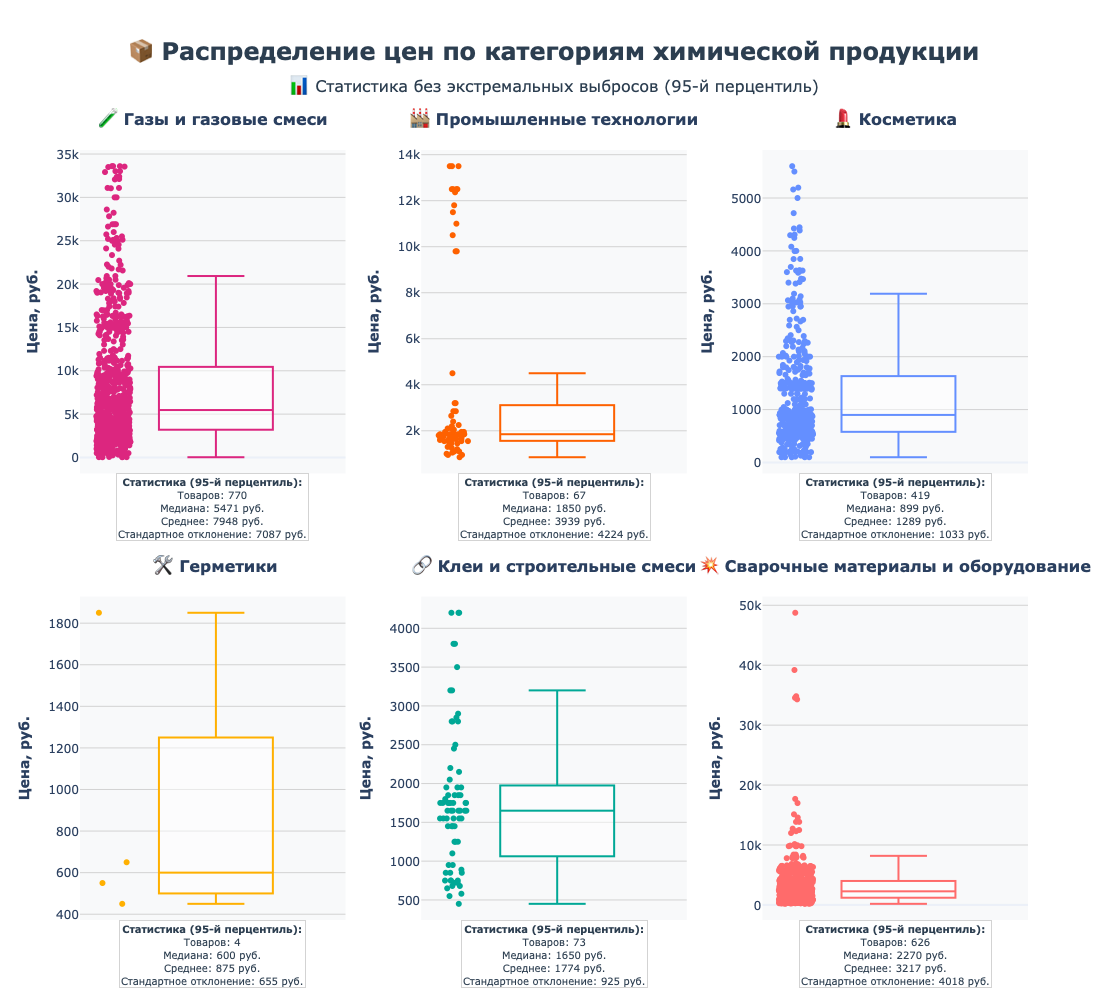

In [129]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

def remove_extreme_outliers(prices, percentile=95):
    threshold = np.percentile(prices, percentile)
    return prices[prices <= threshold]

percentile = 95

categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄',' 🛠️', '🔗', '💥']
categories_emoji_list = list(zip(categories_list, emoji_list))

# Цветовая схема для категорий
colors = ['#DC267F', '#FE6100', '#648FFF', '#FFB000', '#00A896', '#FF6B6B']

# Создаем subplots (2 строки, 3 колонки)
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[f"<b>{emoji} {category}</b><br> " for category, emoji in categories_emoji_list],
    vertical_spacing=0.16,
    horizontal_spacing=0.08
)

categories = data['Категория'].unique()

for i, category in enumerate(categories):
    row = i // 3 + 1
    col = i % 3 + 1
    
    category_prices = data.loc[data['Категория'] == category, 'Цена']
    category_prices = remove_extreme_outliers(category_prices, percentile=percentile)
    fig.add_trace(
        go.Box(
            y=category_prices,
            name=category,
            marker_color=colors[i],
            boxpoints='all',  # показываем выбросы
            jitter=0.3,
            pointpos=-1.8,
            showlegend=False,
            line=dict(width=2),
            fillcolor='rgba(255,255,255,0.5)'
        ),
        row=row, col=col
    )
    
    

# Обновляем layout
fig.update_layout(
    title=dict(
        text=f'<b>📦 Распределение цен по категориям химической продукции</b><br><span style="font-size: 16px;">📊 Статистика без экстремальных выбросов ({percentile}-й перцентиль)</span>',
        x=0.5, y = 0.94,
        font=dict(size=24, color='#2C3E50')
    ),
    margin=dict(t=150),
    template='plotly_white',
    height=1000,
    width=1200,
    font=dict(size=12),
    plot_bgcolor='rgba(248,249,250,1)',
    paper_bgcolor='white'
)

# Обновляем оси
fig.update_yaxes(title_text="<b>Цена, руб.</b>", gridcolor='lightgrey', gridwidth=1)
fig.update_xaxes(showticklabels=False)  # скрываем названия на оси X


# Получаем текущие аннотации (включая названия subplots)
current_annotations = list(fig.layout.annotations)
x_poss = [0.14, 0.58, 0.93]
y_poss = [0.6, 0.0]

# Добавляем твои статистические аннотации
for i, category in enumerate(categories):
    row = i // 3 + 1
    col = i % 3 + 1
    
    category_data = data.loc[data['Категория'] == category, 'Цена']
    category_data_filtered = remove_extreme_outliers(category_data, percentile=percentile)
    
    # Вычисляем статистику
    median_price = category_data_filtered.median()
    mean_price = category_data_filtered.mean()
    std_price = category_data_filtered.std()
    
    stats_text = f"""<b>Статистика ({percentile}-й перцентиль):</b><br>Товаров: {len(category_data_filtered)}<br>Медиана: {median_price:.0f} руб.<br>Среднее: {mean_price:.0f} руб.<br>Стандартное отклонение: {std_price:.0f} руб."""
    
    x_pos = x_poss[col-1]
    y_pos = y_poss[row-1]

    # Получаем домены subplot'а
    subplot = fig.get_subplot(row, col)
    x_domain = subplot.xaxis.domain  
    y_domain = subplot.yaxis.domain
    
    # Центр subplot'а
    x_center = (x_domain[0] + x_domain[1]) / 2
    y_bottom = y_domain[0] 
    
    current_annotations.append(
        dict(
            text=stats_text,
            x=x_center, y=y_bottom,
            xref="paper", yref="paper",
            xanchor='center', yanchor='top',
            showarrow=False,
            font=dict(size=10, color='#2C3E50'),
            bgcolor='rgba(255,255,255,0.8)',
            bordercolor='lightgrey',
            borderwidth=1,
        )
    )

# Обновляем ВСЕ аннотации
fig.update_layout(annotations=current_annotations)

fig.show()


# Сохраняем график в PNG
# fig.write_image(
#     FOLDER_PATH + 'graphs/boxplots/Category_Boxplots.png',
#     format="png",
#     width=1200,
#     height=1000, 
#     scale=2)


## All Groups Boxplot: 📊 Полная Статистика (Логарифмическая шкала цен)

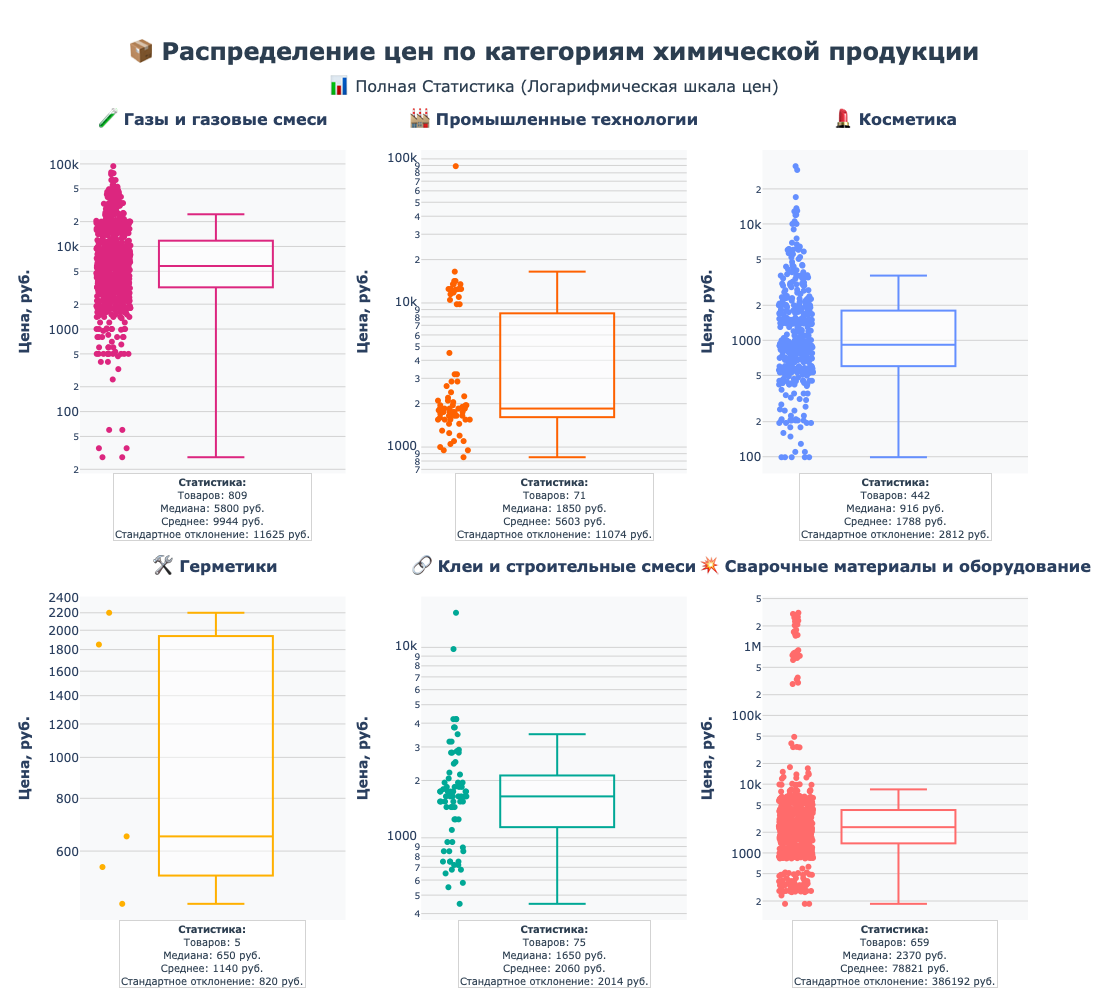

In [130]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

def remove_extreme_outliers(prices, percentile=95):
    threshold = np.percentile(prices, percentile)
    return prices[prices <= threshold]

percentile = 95

categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄',' 🛠️', '🔗', '💥']
categories_emoji_list = list(zip(categories_list, emoji_list))

# Цветовая схема для категорий
colors = ['#DC267F', '#FE6100', '#648FFF', '#FFB000', '#00A896', '#FF6B6B']

# Создаем subplots (2 строки, 3 колонки)
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[f"<b>{emoji} {category}</b><br> " for category, emoji in categories_emoji_list],
    vertical_spacing=0.16,
    horizontal_spacing=0.08
)

categories = data['Категория'].unique()

for i, category in enumerate(categories):
    row = i // 3 + 1
    col = i % 3 + 1
    
    category_prices = data.loc[data['Категория'] == category, 'Цена']
    category_prices = category_prices
    fig.add_trace(
        go.Box(
            y=category_prices,
            name=category,
            marker_color=colors[i],
            boxpoints='all',  # показываем выбросы
            jitter=0.3,
            pointpos=-1.8,
            showlegend=False,
            line=dict(width=2),
            fillcolor='rgba(255,255,255,0.5)'
        ),
        row=row, col=col
    )
    
    

# Обновляем layout
fig.update_layout(
    title=dict(
        text=f'<b>📦 Распределение цен по категориям химической продукции</b><br><span style="font-size: 16px;">📊 Полная Статистика (Логарифмическая шкала цен)</span>',
        x=0.5, y = 0.94,
        font=dict(size=24, color='#2C3E50')
    ),
    margin=dict(t=150),
    template='plotly_white',
    height=1000,
    width=1200,
    font=dict(size=12),
    plot_bgcolor='rgba(248,249,250,1)',
    paper_bgcolor='white'
)

# Обновляем оси
fig.update_yaxes(type = 'log',title_text="<b>Цена, руб.</b>", gridcolor='lightgrey', gridwidth=1)
fig.update_xaxes(showticklabels=False)  # скрываем названия на оси X


# Получаем текущие аннотации (включая названия subplots)
current_annotations = list(fig.layout.annotations)
x_poss = [0.14, 0.58, 0.93]
y_poss = [0.6, 0.0]

# Добавляем твои статистические аннотации
for i, category in enumerate(categories):
    row = i // 3 + 1
    col = i % 3 + 1
    
    category_data = data.loc[data['Категория'] == category, 'Цена']
    category_data_filtered = category_data
    
    # Вычисляем статистику
    median_price = category_data_filtered.median()
    mean_price = category_data_filtered.mean()
    std_price = category_data_filtered.std()
    
    stats_text = f"""<b>Статистика:</b><br>Товаров: {len(category_data_filtered)}<br>Медиана: {median_price:.0f} руб.<br>Среднее: {mean_price:.0f} руб.<br>Стандартное отклонение: {std_price:.0f} руб."""
    
    x_pos = x_poss[col-1]
    y_pos = y_poss[row-1]

    # Получаем домены subplot'а
    subplot = fig.get_subplot(row, col)
    x_domain = subplot.xaxis.domain  
    y_domain = subplot.yaxis.domain
    
    # Центр subplot'а
    x_center = (x_domain[0] + x_domain[1]) / 2
    y_bottom = y_domain[0] 
    
    current_annotations.append(
        dict(
            text=stats_text,
            x=x_center, y=y_bottom,
            xref="paper", yref="paper",
            xanchor='center', yanchor='top',
            showarrow=False,
            font=dict(size=10, color='#2C3E50'),
            bgcolor='rgba(255,255,255,0.8)',
            bordercolor='lightgrey',
            borderwidth=1,
        )
    )

# Обновляем ВСЕ аннотации
fig.update_layout(annotations=current_annotations)

fig.show()


# Сохраняем график в PNG
# fig.write_image(
#     FOLDER_PATH + 'graphs/boxplots/Category_Boxplot_log.png',
#     format="png",
#     width=1200,
#     height=1000, 
#     scale=2)


## Single Group Boxplot: 📊 Статистика без экстремальных выбросов (N-й перцентиль)

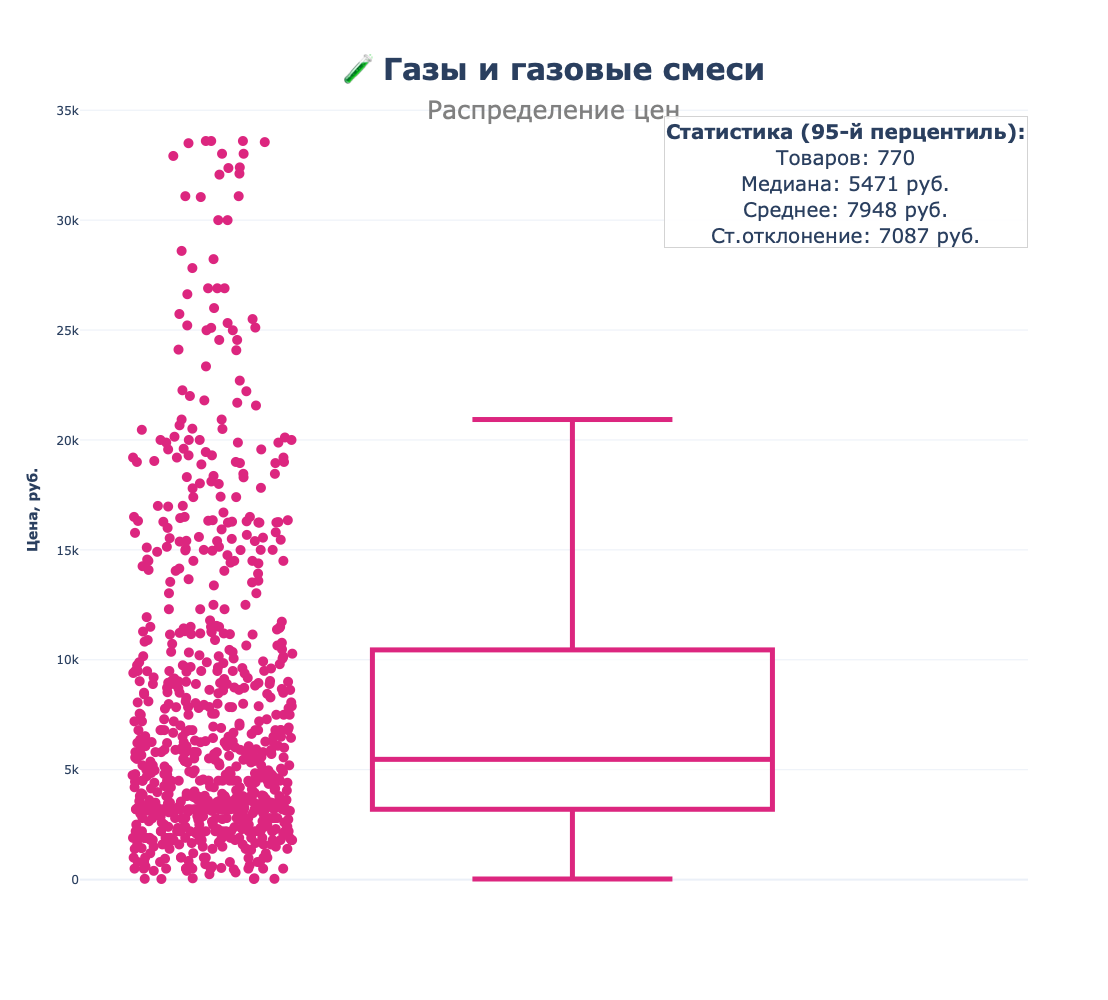

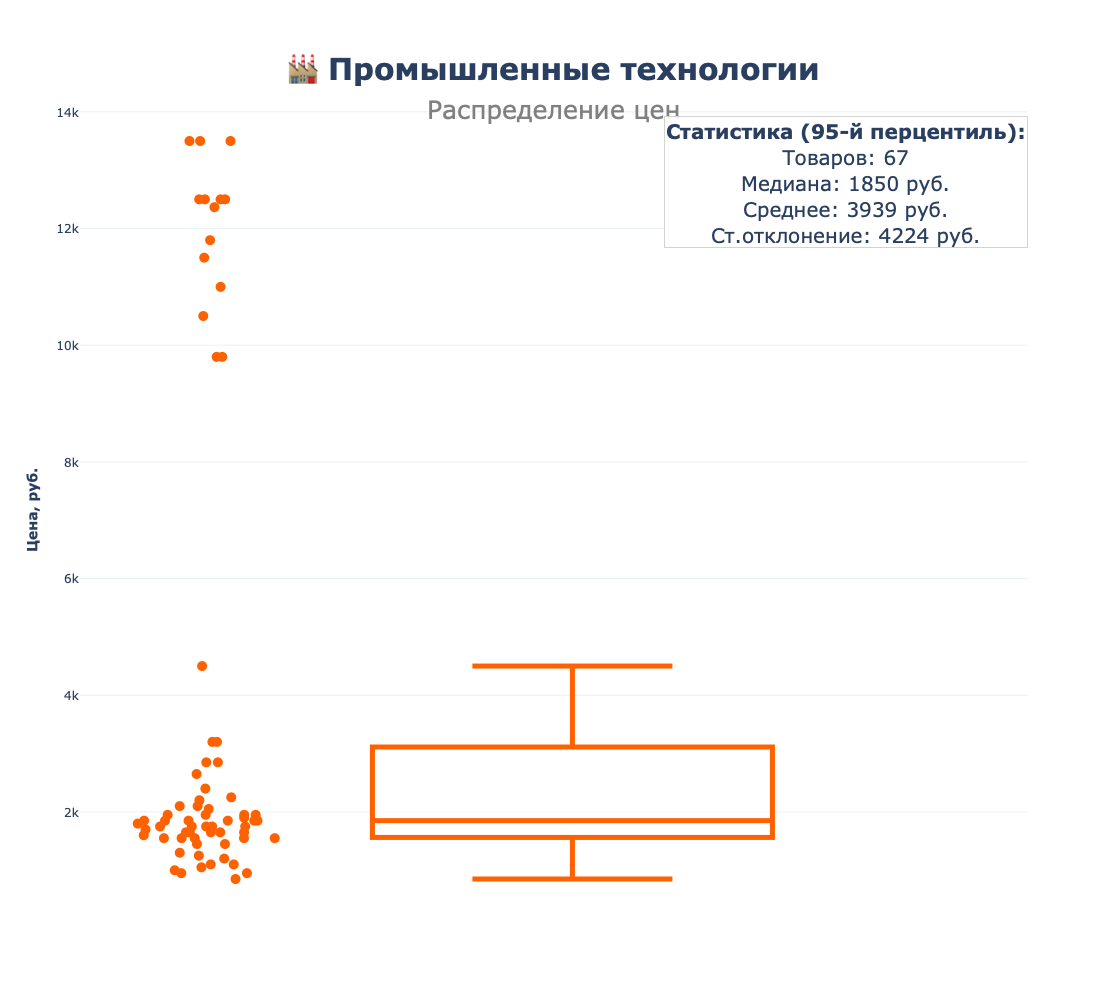

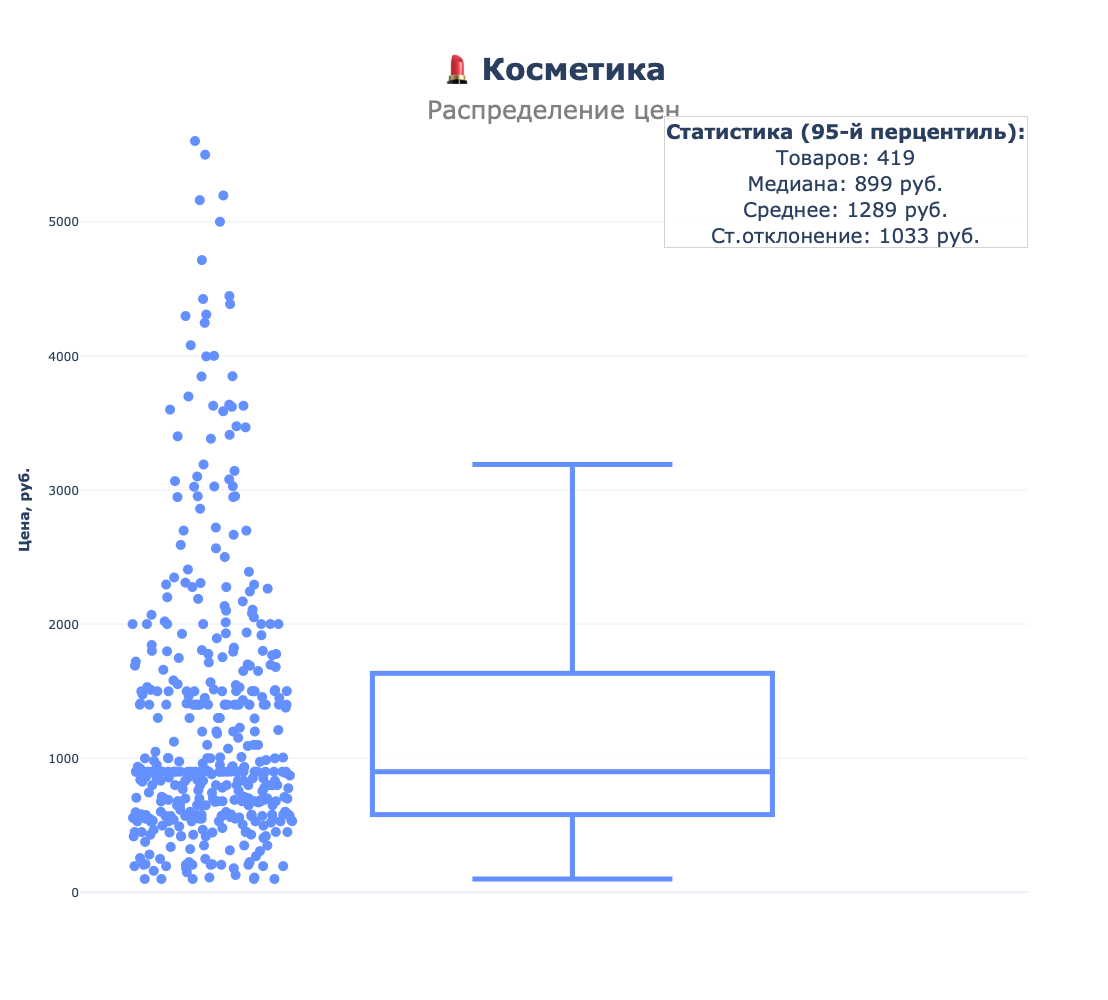

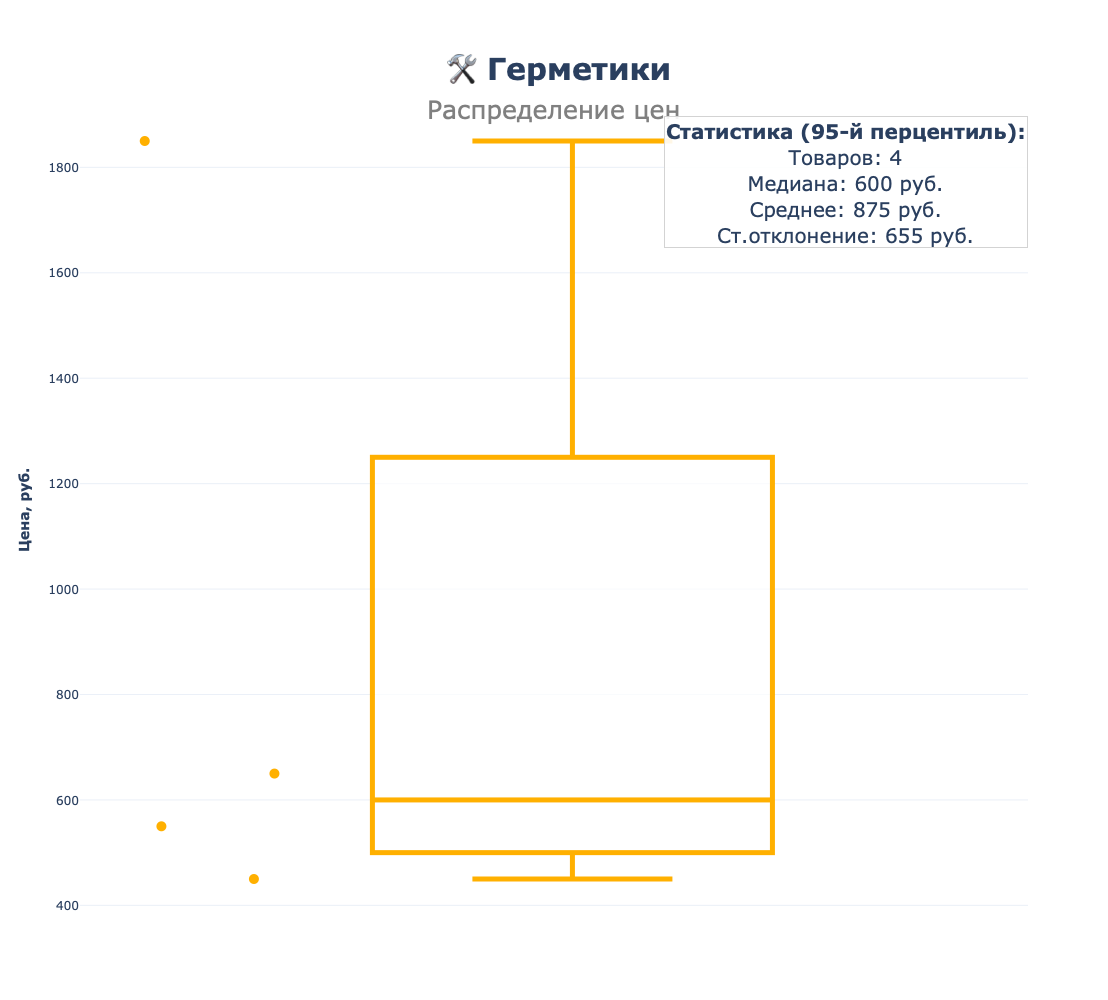

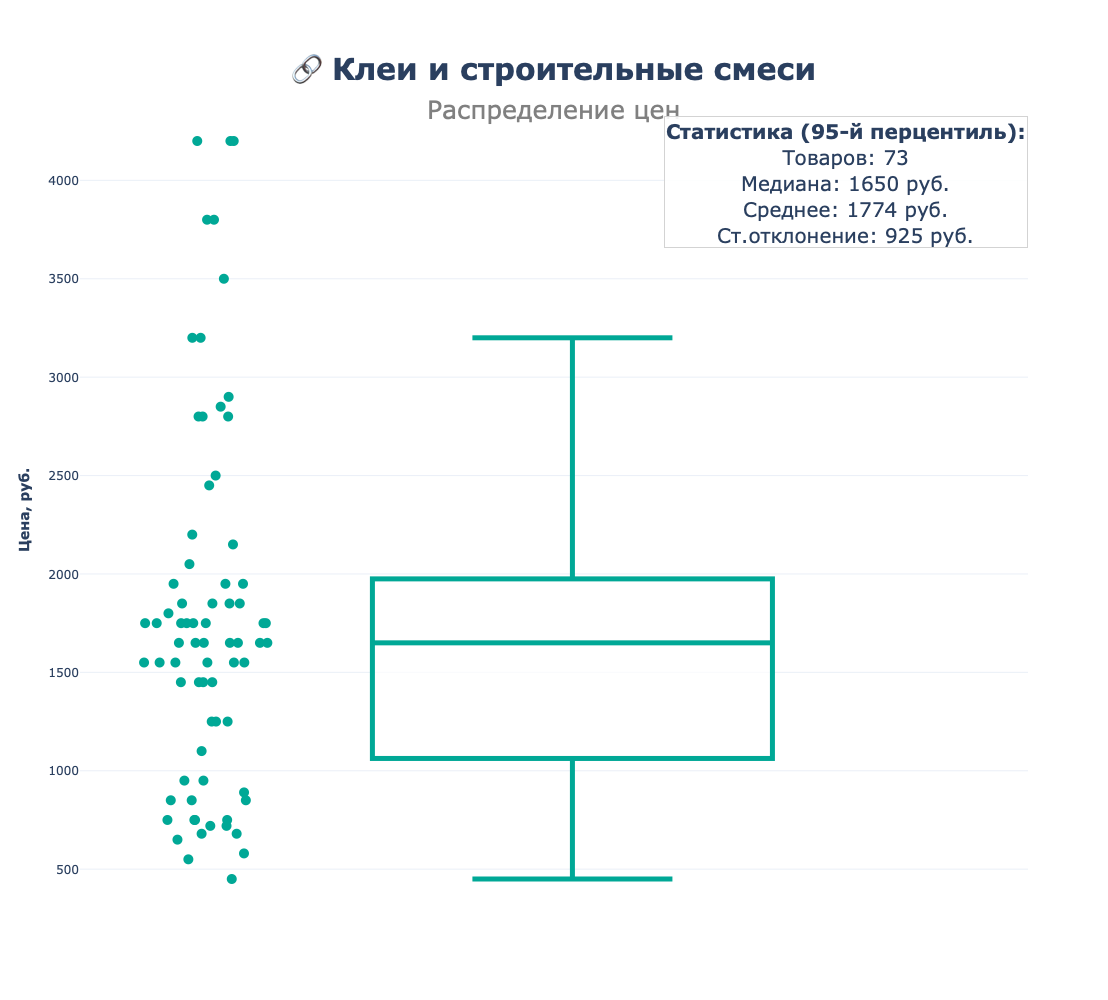

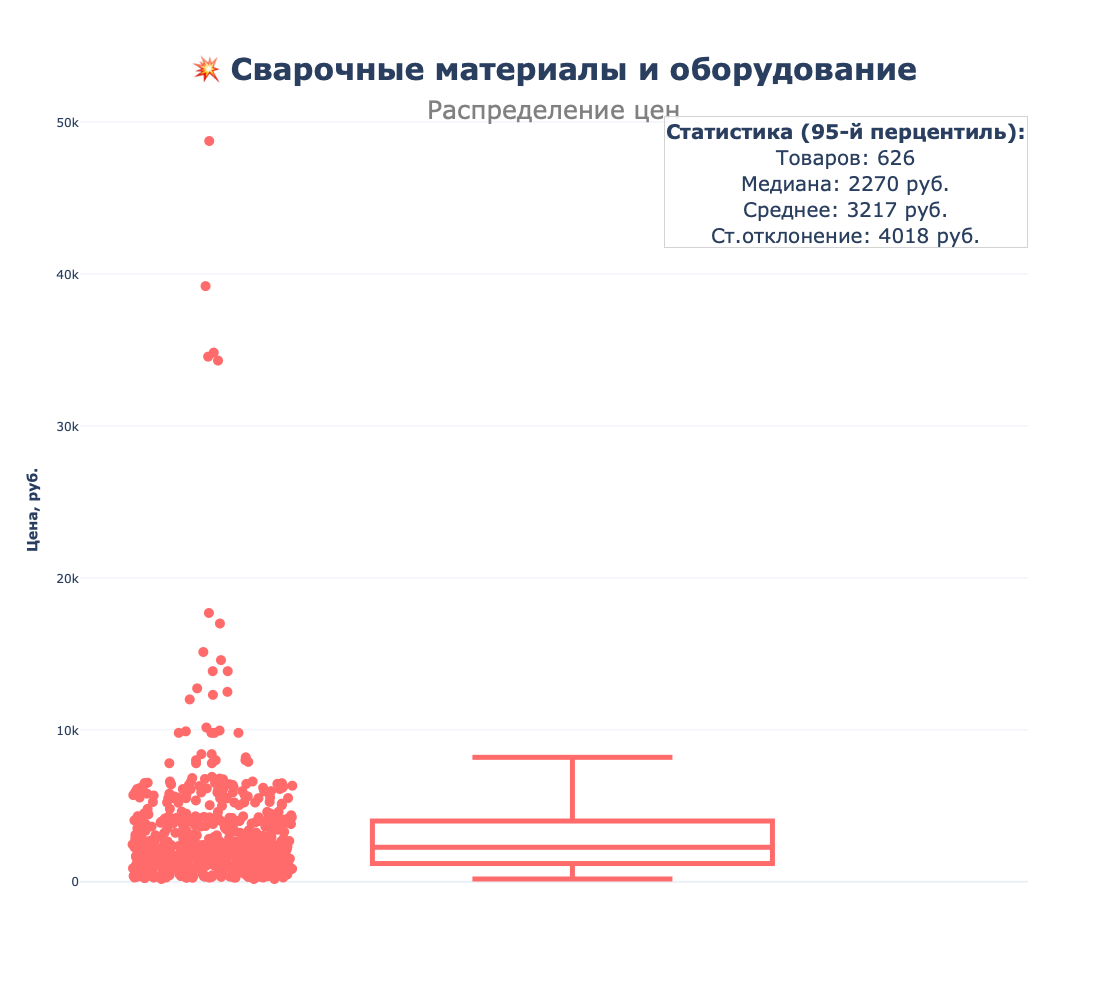

In [131]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd


def remove_extreme_outliers(prices, percentile=95):
    threshold = np.percentile(prices, percentile)
    return prices[prices <= threshold]

percentile = 95

categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄',' 🛠️', '🔗', '💥']
categories_emoji_list = list(zip(categories_list, emoji_list))

# Цветовая схема для категорий
#colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
colors = ['#DC267F', '#FE6100', '#648FFF', '#FFB000', '#00A896', '#FF6B6B']
# Дополнительно: отдельные красивые графики для каждой категории
for i, category in enumerate(categories):
    
    emoji = categories_emoji_list[i][1]
    
    category_prices = data.loc[data['Категория'] == category, 'Цена']
    category_prices = remove_extreme_outliers(category_prices, percentile=percentile)
    fig_single = go.Figure()
    
    fig_single.add_trace(go.Box(
        y=category_prices,
        name = category,
        marker_color=colors[i],
        boxpoints='all',  # показываем все точки
        jitter=0.4,
        pointpos=-1.8,
        line=dict(width=5, color=colors[i]),
        marker=dict(size=10),  # увеличить размер точек
        fillcolor='rgba(255,255,255,0.7)',
        hoverinfo='y'
    ))
    
    # Статистика для аннотации
    median_price = category_prices.median()
    mean_price = category_prices.mean()
    std_price = category_prices.std()
    
    fig_single.update_layout(
        title=dict(
            text=f'<b>{emoji} {category}</b><br><span style="font-size:25px; color:gray">Распределение цен</span>',
            font=dict(size=30),
            x=0.5, y = 0.92
        ),
        xaxis=dict(showticklabels=False, title_text=""),
        yaxis_title="<b>Цена, руб.</b>",
        showlegend=False,
        template='plotly_white',
        height=1000,
        width=1200,
        font=dict(size=12),
        annotations=[
            dict(
                x=1.0, y=0.98,
                xref="paper", yref="paper",
                text=f"<b>Статистика ({percentile}-й перцентиль):</b><br>Товаров: {len(category_prices)}<br>Медиана: {median_price:.0f} руб.<br>Среднее: {mean_price:.0f} руб.<br>Ст.отклонение: {std_price:.0f} руб.",
                showarrow=False,
                bgcolor='rgba(255,255,255,0.9)',
                bordercolor='lightgrey',
                borderwidth=1,
                font=dict(size=20)
            )
        ]
    )
    
    fig_single.show()
    
    # Сохраняем график в PNG
    # fig_single.write_image(
    #     FOLDER_PATH + 'graphs/boxplots/' + f'{category}_boxplots.png',
    #     format="png",
    #     width=1200,
    #     height=1000, 
    #     scale=2)

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2061 entries, 0 to 2060
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Компания           2061 non-null   object 
 1   Категория          2061 non-null   object 
 2   Название товара    2061 non-null   object 
 3   Цена               2061 non-null   float64
 4   Скидочная Цена     2061 non-null   float64
 5   Объем              2061 non-null   float64
 6   Единицы Измерения  2061 non-null   object 
 7   Цена_Q3_2025       2061 non-null   int64  
 8   Цена_Q2_2025       2061 non-null   int64  
 9   Цена_Q1_2025       2061 non-null   int64  
 10  Цена_Q4_2024       2061 non-null   int64  
 11  Цена_Q3_2024       2061 non-null   int64  
 12  Цена_Q2_2024       2061 non-null   int64  
 13  Цена_Q1_2024       2061 non-null   int64  
 14  Цена_Q4_2023       2061 non-null   int64  
 15  Цена_Q3_2023       2061 non-null   int64  
 16  Цена_Q2_2023       2061 non-n

## Bar: 📊 Количество товаров по категориям

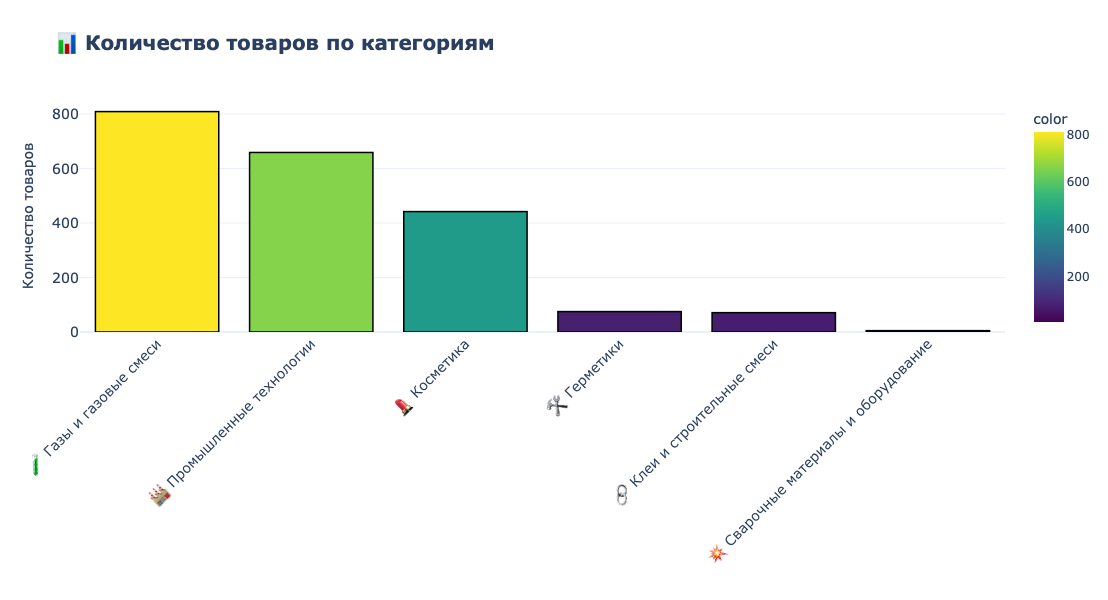

In [134]:
import plotly.express as px

categories_count = data['Категория'].value_counts()
categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄',' 🛠️', '🔗', '💥']
categories_emoji_list = list(zip(categories_list, emoji_list))


fig = px.bar(
    x= [f'{category} {emoji}' for emoji, category in categories_emoji_list],
    y=categories_count.values,
    title='<b>📊 Количество товаров по категориям</b>',
    labels={'x': '', 'y': 'Количество товаров'},
    color=categories_count.values,
    color_continuous_scale='Viridis'
)

fig.update_layout(
    template='plotly_white',
    height=600,
    width=900,
    font=dict(size=12),
    title_font_size=20,
    showlegend=False,
    xaxis_tickangle=-45
)

fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    hovertemplate='<b>%{x}</b><br>Товаров: %{y}'
)

fig.update_xaxes(tickfont=dict(size=14))
fig.update_yaxes(tickfont=dict(size=14))

fig.show()

# Сохраняем график в PNG
# fig.write_image(
#     FOLDER_PATH + 'graphs/' + f'categories_number_of_products_bar.png',
#     format="png",
#     width=900,
#     height=600, 
#     scale=2)